In [153]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [155]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [156]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = train_df.isnull().sum()/train_df.isnull().count()*100
percent = percent.sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000


Text(0.5, 1.0, 'Male')

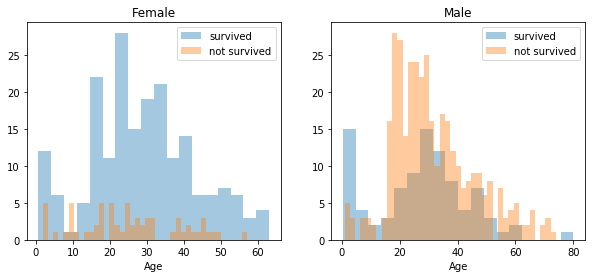

In [158]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


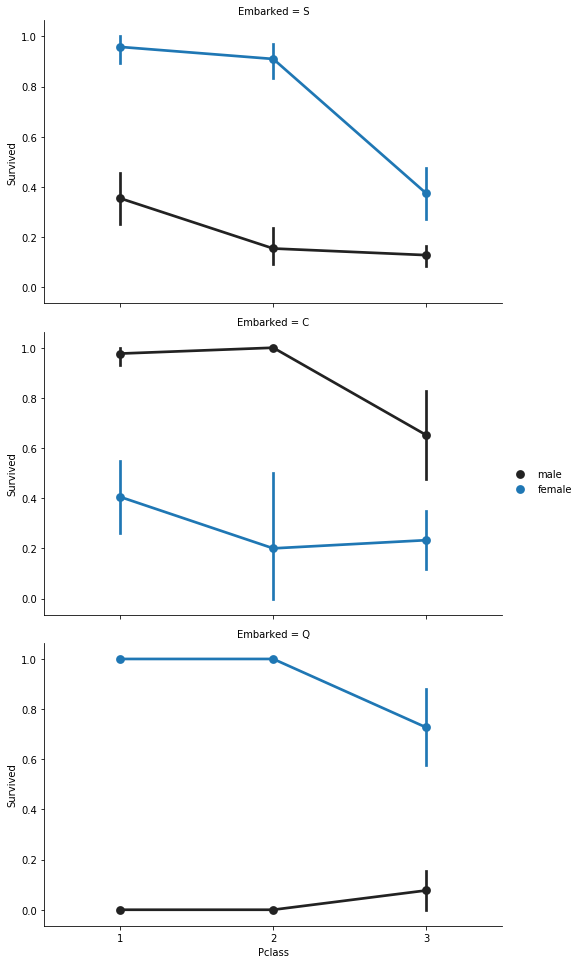

In [159]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

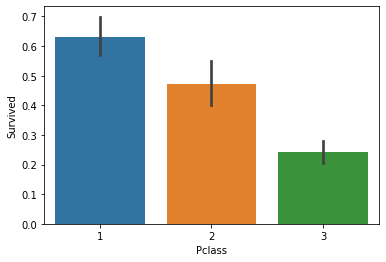

In [160]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [161]:
train_df = train_df.drop(['PassengerId'], axis = 1)

In [192]:
test_df = test_df.drop(['PassengerId'], axis = 1)

In [162]:
data = [train_df, test_df]
for dataset in data:
    mean = dataset['Age'].mean()
    dataset['Age'] = dataset['Age'].fillna(mean);

In [163]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [164]:
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [165]:
mode1 = train_df['Embarked'].mode()
mode1 = str (mode1)
train_df['Embarked'] = train_df['Embarked'].fillna(mode1);

mode2 = test_df['Embarked'].mode()
mode2 = str (mode2)
test_df['Embarked'] = test_df['Embarked'].fillna(mode2);

In [166]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = train_df.isnull().sum()/train_df.isnull().count()*100
percent = percent.sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [167]:
train_df['Fare'] = train_df['Fare'].fillna(0)
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['Age'] = train_df['Age'].astype(int)
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df['Fare'] = test_df['Fare'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

In [168]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null int64
Embarked    891 non-null object
dtypes: int64(6), object(4)
memory usage: 69.7+ KB


In [169]:
genders = {"male": 1, "female": 0}
train_df['Sex'] = train_df['Sex'].map(genders)
test_df['Sex'] = test_df['Sex'].map(genders)

In [170]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [171]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,C
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,S
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,S


In [172]:
temp = train_df['Embarked']

In [174]:
train_df['Embarked'] = train_df['Embarked'].astype(str);
test_df['Embarked'] = test_df['Embarked'].astype(str);
ports = {"S": 0, "C": 1, "Q": 2}
train_df['Embarked'] = train_df['Embarked'].map(ports)
test_df['Embarked'] = test_df['Embarked'].map(ports)

In [179]:
train_df['Embarked'] = train_df['Embarked'].fillna(1.0)

In [180]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.7+ KB


In [181]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [182]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,0.0
1,1,1,0,38,1,0,71,1.0
2,1,3,0,26,0,0,7,0.0
3,1,1,0,35,1,0,53,0.0
4,0,3,1,35,0,0,8,0.0


In [183]:
Y_train = train_df['Survived']
train_df = train_df.drop(['Survived'], axis = 1)

In [184]:
X_train = train_df

In [185]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null float64
dtypes: float64(1), int64(6)
memory usage: 48.8 KB


In [187]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
Y_test = pd.read_csv("gender_submission.csv")

In [193]:
Y_pred = logReg.predict(test_df)

In [195]:
count = 0
for i, j in zip(range(len(Y_test)), Y_pred):
    if(Y_test['Survived'][i] == j):
        count += 1
print(count / len(Y_test))

0.9569377990430622
